In [0]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Change working directory to make it easier to access the files- (Folder inside of Colab- CNN folder- Images- Train/Test folder- Inside of each there are bunny/dog folders) 
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks/Cats_Vs_Dogs")
os.getcwd() 

'/content/gdrive/My Drive/Colab Notebooks/Cats_Vs_Dogs'

In [0]:
# Import libraries
from __future__ import print_function, division

import numpy as np
import random
import os
import glob
import cv2
import datetime
import pandas as pd
import time
import h5py
import csv

from scipy.misc import imresize, imsave

from sklearn.metrics import log_loss, confusion_matrix
from sklearn.utils import shuffle
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold
from PIL import Image, ImageChops, ImageOps

import matplotlib.pyplot as plt
import seaborn as sns

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop
from keras import backend as K
from keras.callbacks import EarlyStopping, Callback
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras import optimizers
from keras.models import Sequential, model_from_json
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, Activation, Dropout, Flatten, Dense, BatchNormalization
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
# use ImageDataGenerator to preprocess the data
from keras.preprocessing.image import ImageDataGenerator

In [0]:
#Giving labels to the images: 1 for dog, 0 for cat

path = "/content/gdrive/My Drive/Colab Notebooks/Cats_Vs_Dogs/train"
files = os.listdir(path)
categories = []

for filename in files:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    elif category == 'cat':
        categories.append(0)
    else: pass
df = pd.DataFrame({
    'filename': files,
    'category': categories
})


'''
path_dogs = "/content/gdrive/My Drive/Colab Notebooks/Cats_Vs_Dogs/train"
categories1 = []
files_dogs = os.listdir(path_dogs)

for filename in files_dogs:
    category = filename.split('.')[0]
    if category == 'dog':
        categories1.append(1)
    else: pass
df1 = pd.DataFrame({
    'filename': files_dogs,
    'category': categories1
})

path_cats= "/content/gdrive/My Drive/Colab Notebooks/Cats_Vs_Dogs/train/Cats"
files_cats = os.listdir(path_cats)
categories2 = []
categories3=[]
for filename in files_cats:
    category = filename.split('.')[0]
    if category == 'cat':
        categories2.append(0)
    else:
      categories3.append(filename)

df3 = pd.DataFrame({
    'filename': files_cats,
    'category': categories2
})

frames=[df1,df3]
df=pd.concat(frames)


Deleting extra files
import glob, os

path_cats= "/content/gdrive/My Drive/Colab Notebooks/Cats_Vs_Dogs/train/Cats"
files_cats = os.listdir(path_cats)

for filename in files_cats:
    if 'Copy' in filename:
        #os.remove("/content/gdrive/My Drive/Colab Notebooks/Cats_Vs_Dogs/train/Cats/"+filename)
        print("/content/gdrive/My Drive/Colab Notebooks/Cats_Vs_Dogs/train/Cats/"+filename)
        '''

'\npath_dogs = "/content/gdrive/My Drive/Colab Notebooks/Cats_Vs_Dogs/train"\ncategories1 = []\nfiles_dogs = os.listdir(path_dogs)\n\nfor filename in files_dogs:\n    category = filename.split(\'.\')[0]\n    if category == \'dog\':\n        categories1.append(1)\n    else: pass\ndf1 = pd.DataFrame({\n    \'filename\': files_dogs,\n    \'category\': categories1\n})\n\npath_cats= "/content/gdrive/My Drive/Colab Notebooks/Cats_Vs_Dogs/train/Cats"\nfiles_cats = os.listdir(path_cats)\ncategories2 = []\ncategories3=[]\nfor filename in files_cats:\n    category = filename.split(\'.\')[0]\n    if category == \'cat\':\n        categories2.append(0)\n    else:\n      categories3.append(filename)\n\ndf3 = pd.DataFrame({\n    \'filename\': files_cats,\n    \'category\': categories2\n})\n\nframes=[df1,df3]\ndf=pd.concat(frames)\n\n\nDeleting extra files\nimport glob, os\n\npath_cats= "/content/gdrive/My Drive/Colab Notebooks/Cats_Vs_Dogs/train/Cats"\nfiles_cats = os.listdir(path_cats)\n\nfor filena

In [0]:
#move cats, dogs images to "train" folder
'''
import os, shutil

topath = "/content/gdrive/My Drive/Colab Notebooks/Cats_Vs_Dogs/train"
movedog = "/content/gdrive/My Drive/Colab Notebooks/Cats_Vs_Dogs/train/Dogs"
movecat='/content/gdrive/My Drive/Colab Notebooks/Cats_Vs_Dogs/train/Cats'

files1 = os.listdir(movedog)
files1.sort()
for f in files1:
  if "dog" in f:
    src = os.path.join(movedog, f)
    dst = os.path.join(topath, f)
    shutil.move(src,dst)
  else: pass

files2 = os.listdir(movecat)
files2.sort()
for f in files2:
  if "cat" in f:
    src = os.path.join(movecat, f)
    dst = os.path.join(topath, f)
    shutil.move(src,dst)
  else: pass
'''

In [0]:
#Bar chart for the categories
df['category'].value_counts().plot.bar()

In [0]:
df=shuffle(df)
df

In [0]:
#Prepare Test and Train Data

train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

train_df['category'].value_counts().plot.bar()

total_train = train_df.shape[0] #the number of images in the training df
total_validate = validate_df.shape[0]  #the number of images in the validate df
batch_size=15

In [0]:
#FAST_RUN = False
IMAGE_WIDTH=50
IMAGE_HEIGHT=50
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # RGB color

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

In [0]:
#Traning Generator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/gdrive/My Drive/Colab Notebooks/Cats_Vs_Dogs/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=batch_size
)

Found 20000 images belonging to 2 classes.


In [0]:
#Validation Generator

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/gdrive/My Drive/Colab Notebooks/Cats_Vs_Dogs/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=batch_size
)

Found 5000 images belonging to 2 classes.


In [0]:
#See how our generator work

example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/content/gdrive/My Drive/Colab Notebooks/Cats_Vs_Dogs/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='binary'
)

plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [0]:
#Early Stop
earlystop = EarlyStopping(patience=10)

#Learning Rate Reduction
#We will reduce the learning rate when then accuracy not increase for 2 steps
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [0]:
validate_df['category'].value_counts().plot.bar()

In [0]:
#Fit Model
#epochs=3 if FAST_RUN else 25
history = model.fit_generator(
    train_generator, 
    epochs=25,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/25
1333/1333 [==============================] - 667s 501ms/step - loss: 0.6517 - acc: 0.6670 - val_loss: 0.6208 - val_acc: 0.6649
Epoch 2/25
1333/1333 [==============================] - 665s 499ms/step - loss: 0.5386 - acc: 0.7273 - val_loss: 1.4934 - val_acc: 0.5890
Epoch 3/25
1333/1333 [==============================] - 664s 498ms/step - loss: 0.4975 - acc: 0.7590 - val_loss: 0.5220 - val_acc: 0.7649
Epoch 4/25
1333/1333 [==============================] - 666s 499ms/step - loss: 0.4773 - acc: 0.7688 - val_loss: 0.6721 - val_acc: 0.6983
Epoch 5/25
1333/1333 [==============================] - 657s 493ms/step - loss: 0.4545 - acc: 0.7824 - val_loss: 0.5014 - val_acc: 0.7633

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/25
1333/1333 [==============================] - 660s 495ms/step - loss: 0.4236 - acc: 0.8047 - val_loss: 0.4775 - val_acc: 0.7793
Epoch 7/25
1333/1333 [==============================] - 654s 491ms/step - loss: 0.4076 - ac

In [121]:
#Save Model


model_json = model.to_json()
!mkdir Saved_models
with open("Saved_models/cnn_base_model.json","w") as json_file:
    json_file.write(model_json)
    
model.save_weights("Saved_models/cnn_base_model.h5")
print("Saved model to disk")


#model.save_weights("model.h5")
#print("Saved model to disk")


## load weights into new model
#loaded_model.load_weights("model.h5")
#print("Loaded model from disk")

# evaluate loaded model on test data
#loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#score = loaded_model.evaluate(X, Y, verbose=0)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk


In [122]:
#Evaluate the model
json_file = open('Saved_models/cnn_base_model.json', 'r')

loaded_classifier_json = json_file.read()

json_file.close()

loaded_classifier = model_from_json(loaded_classifier_json)

loaded_classifier.load_weights("Saved_models/cnn_base_model.h5")
print("Loaded model from disk")

loaded_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Loaded model from disk


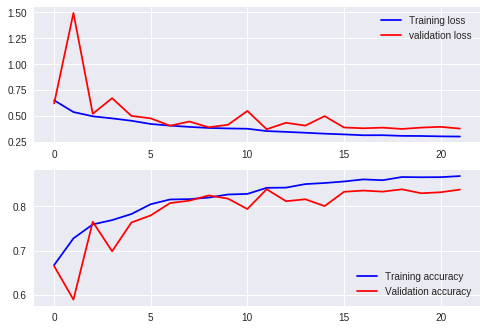

In [107]:
#Virtualize Training
'''
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
legend = plt.legend(loc='best', shadow=True)

ax1.set_xticks(np.arange(1, 25, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 25, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()
'''

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

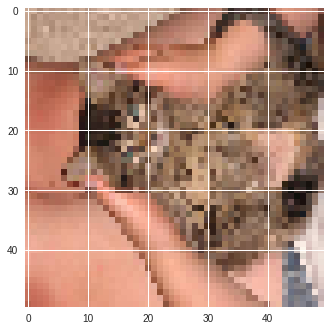

In [150]:
test_image = load_img('test1/Unknown/6.jpg', target_size = (50, 50))
plt.imshow(test_image)
plt.show()

In [151]:
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_classifier.predict(test_image)

if result[0][0] == 1:
    prediction = 'This is a dog'
else:
    prediction = 'This is a cat'

print (prediction)


This is a cat


In [0]:
#Prepare Testing Data
test_filenames = os.listdir("./test1/Unknown")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]


In [153]:
#Create Testing Generator
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "./test1/Unknown", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 images.


In [0]:
#Predict
predict = loaded_classifier.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

#As predicted of binary classification result return probability that image likely to be a dog. 
#So we will have threshold 0.5 which mean if predicted value more than 50% it is a dog and under 50% will be a cat.

In [0]:
threshold = 0.5
test_df['probability'] = predict
test_df['category'] = np.where(test_df['probability'] > threshold, 1,0)

In [0]:
#Virtaulize Result
test_df['category'].value_counts().plot.bar()


In [0]:
#See predicted result with images
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    probability = row['probability']
    img = load_img("../input/test1/test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' '(' + "{}".format(round(probability, 2)) + ')')
plt.tight_layout()
plt.show()

In [0]:
#Submission
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)